## Task 1:Business Understanding and problem Framing.

### Introduction:

> You are working as a Junior Data Scientist at BCG X and you work within a larger team, where each member has a different role and level of responsibility. Your team has been assigned a new project for a client called PowerCo.
The Associate Director (AD) of the Data Science team held a team meeting to discuss the client brief. You’ll be working closely with a senior data scientist on your team.

### Problem Statement:

> PowerCo is a major gas and electricity utility that supplies to small and medium sized enterprises.
The energy market has had a lot of change in recent years and there are more options than ever for customers to choose from.
PowerCo are concerned about their customers leaving for better offers from other energy providers. When a customer leaves to use another service provider, this is called churn.
This is becoming a big issue for PowerCo and they have engaged BCG to help diagnose the reason why their customers are churning.

### Task Overview:

*   Determine the client data needed for analysis

*   Outline the techniques you'll use to investigate your client's problem

*   Write an email to your Associate Director summarizing your approach



**Subject:** Data Requirements & Analysis Approach for PowerCo Churn Investigation  

Dear [Associate Director's Name],  

I hope you're doing well. Following our discussions on PowerCo’s churn issue, I wanted to outline the key data we’ll need from the client and the techniques we’ll use to investigate the problem.  

### **Data Requirements**  
To effectively analyze customer churn, we will require the following datasets from PowerCo:  
- **Customer Information:** Customer ID, business type, contract details, and location  
- **Energy Usage & Consumption:** Monthly kWh/m³ usage, peak vs. off-peak trends  
- **Billing & Pricing History:** Current and historical PowerCo pricing, competitor pricing, and late payment records  
- **Customer Support Interactions:** Number of support tickets, complaint topics, and resolution times  
- **Churn Labels:** Customer status (active vs. churned) and churn dates  
- **External Market Data:** Competitor offers, regulatory changes, and economic indicators  

### **Analytical Approach & Techniques**  
To diagnose churn drivers and predict at-risk customers, we will apply the following methods:  
- **Exploratory Data Analysis (EDA):** Identifying churn trends, segmenting customers, and assessing pricing impacts  
- **Feature Engineering:** Creating predictive variables from pricing, usage, and engagement data  
- **Machine Learning Models:** Logistic regression, decision trees, and ensemble methods (e.g., Random Forest, XGBoost)  
- **Churn Prediction & Risk Scoring:** Assigning churn risk scores for proactive retention strategies  
- **Competitor Pricing Analysis:** Evaluating the impact of market trends on churn behavior  

Please let me know if you'd like to discuss this further or if there are additional aspects to consider. Looking forward to your feedback.  

Best regards,  
Maxwell  
Junior Data Scientist | BCG X  

### A more **business-friendly version**

**Subject:** Data Needs & Approach for PowerCo Churn Analysis  

Dear [Associate Director's Name],  

I hope you're doing well. Following our discussions on PowerCo’s churn challenge, I wanted to outline the key data we’ll need from the client and our approach to investigating the issue.  

### **Data We’ll Need**  
To understand why customers are leaving, we will require:  
- **Customer Information:** Business type, contract details, and location  
- **Energy Usage:** Monthly consumption patterns and peak usage times  
- **Billing & Pricing:** PowerCo’s pricing history, competitor pricing, and payment behavior (e.g., late payments)  
- **Customer Support Data:** Frequency of support requests, common issues, and resolution times  
- **Churn History:** Records of customers who have left, including when they churned  
- **Market Factors:** External influences such as competitor promotions and industry trends  

### **How We’ll Analyze It**  
To identify patterns and predict churn, we will:  
- **Examine customer trends** to spot common factors among those who leave  
- **Compare pricing and competitor offers** to see if they influence churn  
- **Assess customer engagement** (e.g., support issues) to determine if service experience plays a role  
- **Build predictive models** to help identify customers most at risk of leaving  
- **Provide insights and recommendations** for reducing churn and improving retention  

Please let me know if you’d like to discuss further or if there are additional areas we should explore. Looking forward to your feedback.  

Best regards,  
Maxwell

Junior Data Scientist | BCG X  

# Task 2:Exploratory Data Analysis.

## Task Overview:
The client has sent over 3 data sets:

1. Historical customer data: Customer data such as usage, sign up date, forecasted usage etc
2. Historical pricing data: variable and fixed pricing data etc
3. Churn indicator: whether each customer has churned or not

We need to analyze the client data sets using Python:
*   The data types of each column

*   Descriptive statistics of the dataset

*   Distributions of columns

In [1]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
%matplotlib inline
sns.set(color_codes=True) # Set plot style

In [2]:
# Load the datasets from drive into a pandas dataframe
client_data = pd.read_csv('/content/drive/MyDrive/Forage Virtual Internships/BCG X/client_data.csv')
pricing_data = pd.read_csv('/content/drive/MyDrive/Forage Virtual Internships/BCG X/price_data.csv')


In [3]:
# Display the first few rows of client_data dataset
display(client_data.head())

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
# Display the first few rows of pricing_data dataset
display(pricing_data.head())

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
# print shape of client_data dataset
print(client_data.shape)

(14606, 26)


In [6]:
# print shape of pricing_data dataset
print(pricing_data.shape)

(193002, 8)


In [7]:
# Print the infomation of client_data dataset
print(client_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [8]:
# Print the infomation of pricing_data dataset
print(pricing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB
None


In [9]:
# Print counts of data types of client_data dataset
print(client_data.dtypes.value_counts())

float64    11
object      8
int64       7
Name: count, dtype: int64


In [10]:
# Print counts of data types of pricing_data dataset
print(pricing_data.dtypes.value_counts())

float64    6
object     2
Name: count, dtype: int64


### **Overview of client_data dataset**:

- **Shape:** 14,606 rows × 26 columns
- **Columns:**
  - Customer-related: `id`, `channel_sales`, `origin_up`, `num_years_antig`
  - Consumption data: `cons_12m`, `cons_gas_12m`, `cons_last_month`
  - Dates: `date_activ`, `date_end`, `date_modif_prod`, `date_renewal`
  - Forecasts: `forecast_cons_12m`, `forecast_cons_year`, `forecast_discount_energy`, `forecast_meter_rent_12m`
  - Prices: `forecast_price_energy_off_peak`, `forecast_price_energy_peak`, `forecast_price_pow_off_peak`
  - Other: `has_gas`, `imp_cons`, `margin_gross_pow_ele`, `margin_net_pow_ele`, `nb_prod_act`, `net_margin`, `pow_max`
  - **Target variable:** `churn` (binary: 0 = stayed, 1 = churned)

- **Missing Values:** No missing values in any column.
- **Data Types:**
  - Most numerical columns are `int64` or `float64`.
  - Categorical columns like `channel_sales`, `origin_up`, and `has_gas` are `object`.
  - Date-related columns are stored as `object` (should likely be converted to datetime).

- **Sample Rows:** (First 5 rows)
  - The dataset contains customer IDs, energy consumption, pricing forecasts, contract details, and churn labels.

In [11]:
# Calculate descriptive statistics for numerical columns
pricing_data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [12]:
# Calculate descriptive statistics for numerical columns
client_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


### **Summary Statistics**:

Here are key insights from the dataset's numerical columns:

1. **Consumption Metrics**:
   - **Annual electricity consumption (`cons_12m`)**:
     - Mean: ~159,220 kWh
     - Highly skewed (Max: ~6.2M kWh vs. Median: ~14,116 kWh)
   - **Gas consumption (`cons_gas_12m`)**:
     - Most values are **zero** (Median: 0, 75th percentile: 0), suggesting many customers don't use gas.
   - **Last month's consumption (`cons_last_month`)**:
     - Mean: ~16,090 kWh but the median is only ~792.5 kWh, suggesting a few extreme values.

2. **Forecasted Consumption**:
   - `forecast_cons_12m`: Mean ~1,869 kWh (Max ~82,903 kWh)
   - `forecast_cons_year`: Mean ~1,400 kWh, but the median is only 314 kWh.

3. **Pricing & Discount**:
   - `forecast_price_energy_off_peak`: Mean: 0.14, max: 0.27
   - `forecast_price_energy_peak`: Mean: 0.05, but 75% of values are below 0.1.
   - `forecast_discount_energy`: Mostly zero (median = 0), max at 30.

4. **Margins & Revenue**:
   - **Gross Margin (`margin_gross_pow_ele`)**: Mean ~24.56, max ~374.64.
   - **Net Margin (`net_margin`)**: Mean ~189, highly skewed (Max ~24,570).

5. **Customer Tenure (`num_years_antig`)**:
   - Mean: ~5 years, max: 13 years.

6. **Power Demand (`pow_max`)**:
   - Mean: 18.1 kW, max 320 kW, indicating large variations in customer size.

7. **Churn Rate (`churn`)**:
   - **Only 9.7% churned** (high class imbalance).

### 📊 **Data visualization**:

In [13]:
# Create a function to visualize data using countplot
def data_viz_by_countplot(col, xlab):
  """ This function depicts data visualization using countplot"""
  # Set plot style
  sns.set_style("whitegrid")
  sns.countplot(x = col,
                data = client_data,
                palette="coolwarm",
                hue="churn",
                order = client_data[col].value_counts().index)
  plt.title(f'Churn Rate by {xlab}')
  plt.xlabel(xlab)
  plt.ylabel("Count")
  plt.xticks(rotation=45, ha='right')
  plt.show()

In [14]:
# def data_viz_by_histplot(col, y, ):
#   sns.histplot(client_data[client_data["churn"] == 0]["num_years_antig"],
#                bins=20, label="Not Churned", color="blue", kde=True, alpha=0.6)
#   plt.title("Customer Tenure Distribution by Churn Status")
#   plt.xlabel("Years as a Customer")
#   plt.ylabel("Count")
#   plt.legend()
#   plt.show()

*   **Churn Distribution (Class Imbalance Check)**

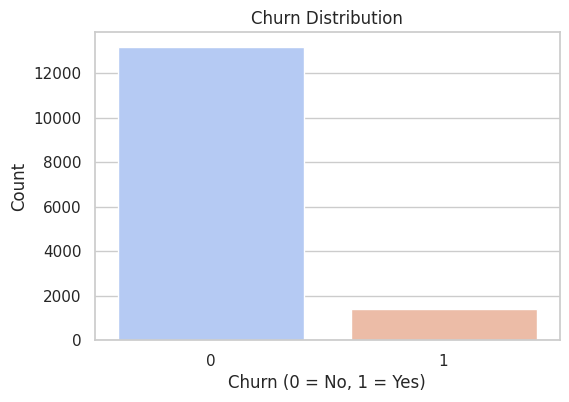

In [15]:
# Set plot style
sns.set_style("whitegrid")

# Plot distribution of churn
plt.figure(figsize=(6, 4))
sns.countplot(x=client_data["churn"], palette="coolwarm")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

### 🔍 **Insights**
- The dataset has a strong **class imbalance**.
- **Most customers stayed** with PowerCo, while **only ~9.7% churned**.
- This imbalance is important because it affects **predictive modeling** (e.g., models may be biased toward the majority class).

*   **Annual electricity consumption distribution (log scale)**

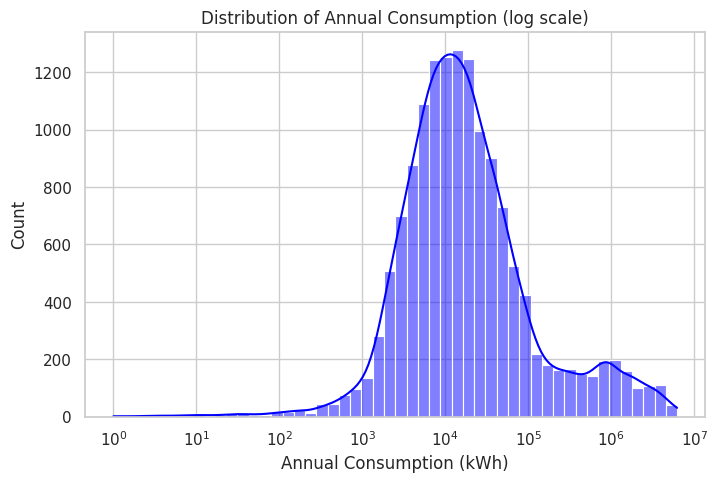

In [16]:
# Remove invalid values
df_cleaned = \
client_data[(client_data["cons_12m"] > 0) & (client_data["cons_12m"].notnull())]

# Histogram of annual consumption
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["cons_12m"], bins=50, kde=True, log_scale=True, color="blue")
plt.title("Distribution of Annual Consumption (log scale)")
plt.xlabel("Annual Consumption (kWh)")
plt.ylabel("Count")
plt.show()

### 🔍 **Insights**
- The consumption data is **highly skewed**.
- Most customers consume **low amounts of energy**, while a few consume **very high amounts** (outliers).
- Using a **log scale** helps make the distribution more readable.
- Outliers may need **further investigation** to see if they impact churn.

*   **Correlation Heatmap (Feature Relationships)**

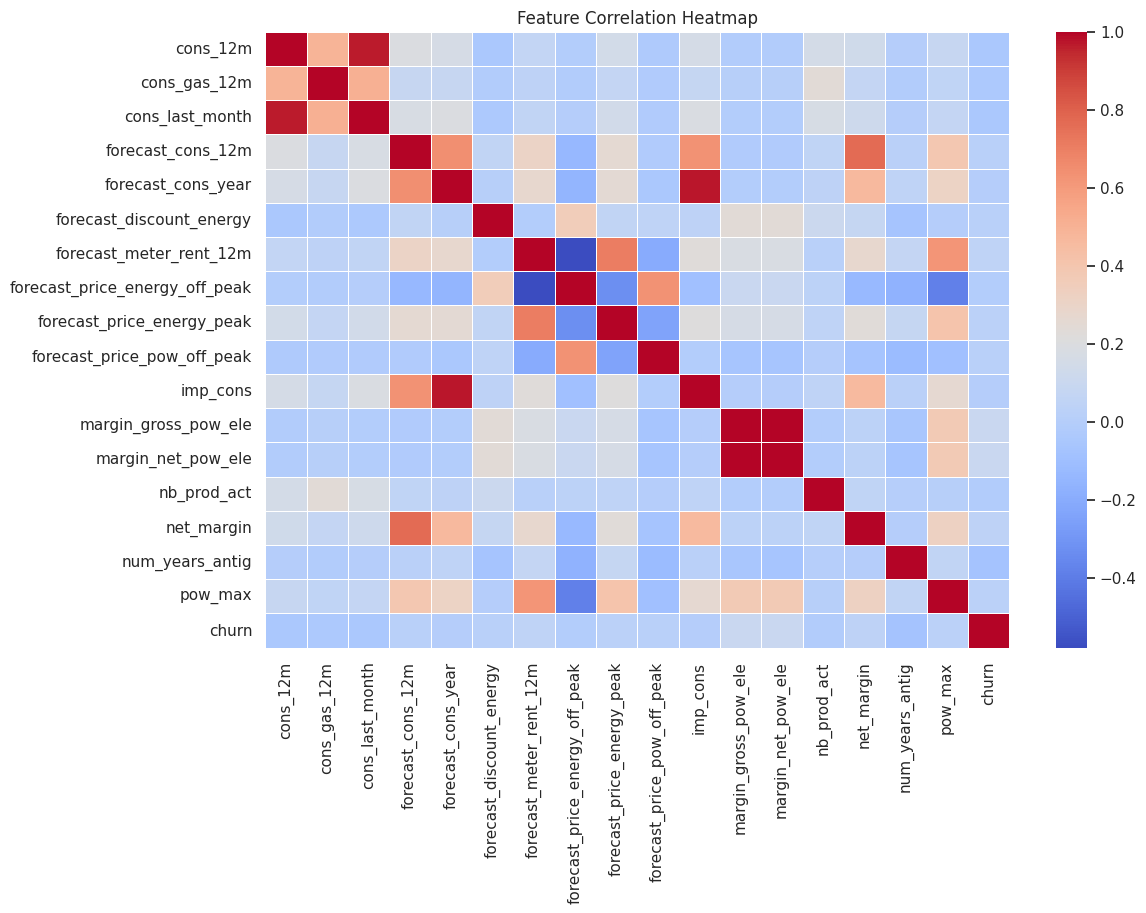

In [17]:
# Compute correlation matrix
plt.figure(figsize=(12, 8))

# Include only numerical features for correlation calculation
correlation_matrix = client_data.select_dtypes(include=np.number).corr()

# Correlation heatmap between numerical features
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### 🔍 **Insights**
- **Consumption features (e.g., `cons_12m`, `cons_last_month`)** are correlated, which is expected.
- **Margins (`margin_gross_pow_ele`, `net_margin`)** show strong correlations with revenue-related metrics.
- **Churn has low correlation with individual numerical features**, meaning **categorical features** might be more important.

*   **Comparing Churn vs. Non-Churned Customers (Boxplot for Consumption)**

In [18]:
# Summary statistics of annual consumption for churn and Non-churn customers.
# client_data.cons_12m.value_counts(dropna=True)
client_data.groupby('churn')['cons_12m'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,13187.0,167867.266550,596815.827246,0.0,5645.0,14075.0,40763.5,6207104.0
1,1419.0,78862.478506,260433.325508,0.0,5836.0,14529.0,40756.0,3955941.0


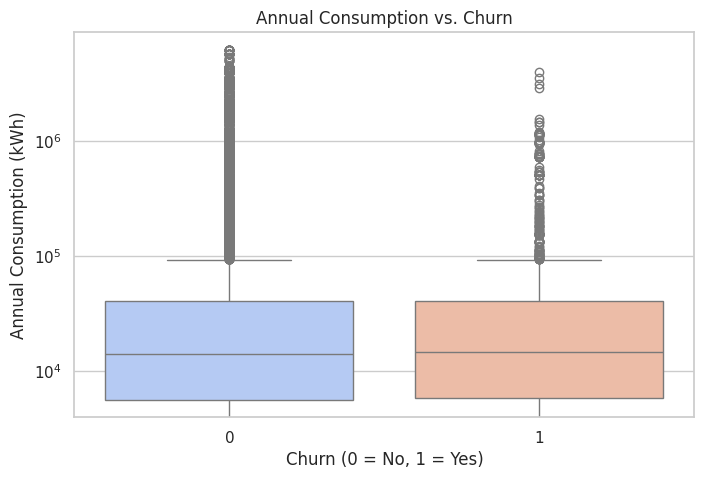

In [19]:
# Visualization of annual consumption comparison between
# churned and non-churned customers
plt.figure(figsize=(8, 5))
sns.boxplot(x="churn", y="cons_12m", data=client_data, palette="coolwarm")
plt.yscale("log")  # Use log scale for better visualization
plt.title("Annual Consumption vs. Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Annual Consumption (kWh)")
plt.show()

### 🔍 **Insights**
- Customers who **churn** tend to have **lower annual consumption**.
- There are **many outliers**, meaning some churned customers **consume very high energy**, but the mean consumption is lower than non-churned customers.
- Lower-consumption customers might be **more price-sensitive** and **more likely to leave for competitors**.

*   **Churn Rate by Sales Channel (Categorical Feature)**



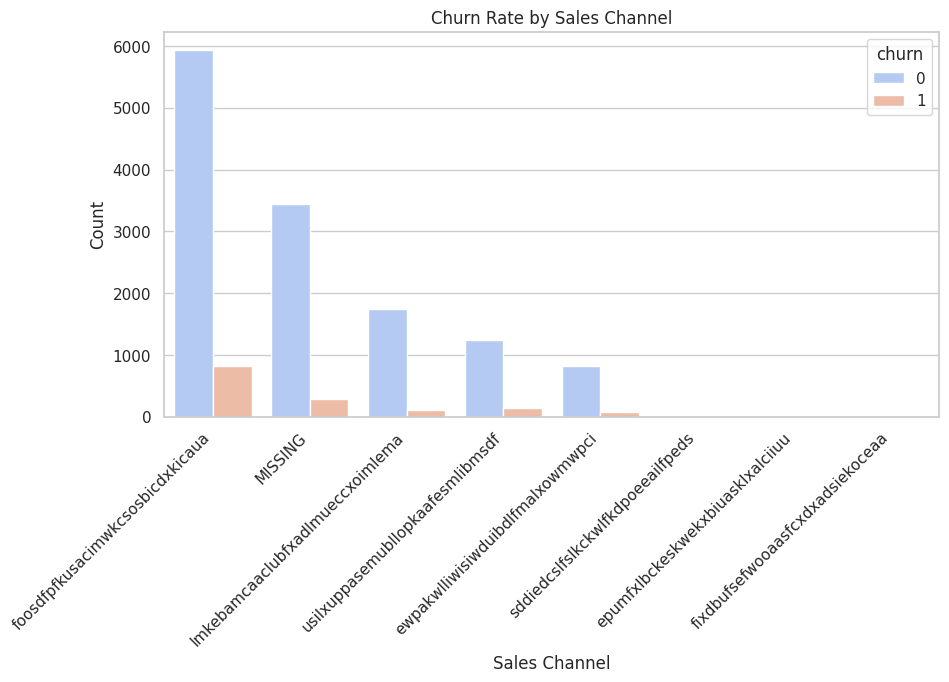

In [20]:
# Visualization of churn breakdown by sales channel

# Set plot figure size
plt.figure(figsize=(10, 5))

# Set visualization parameters
col = "channel_sales"
xlab = "Sales Channel"

# Call visualization function
data_viz_by_countplot(col, xlab)

### 🔍 **Insights**
- Some sales channels have **much higher churn rates** than others.
- Certain sales channels might **attract more price-sensitive customers** who are **more likely to leave**.
- PowerCo may need to **adjust marketing strategies** for specific sales channels.



*   **Churn by Number of Active Products**



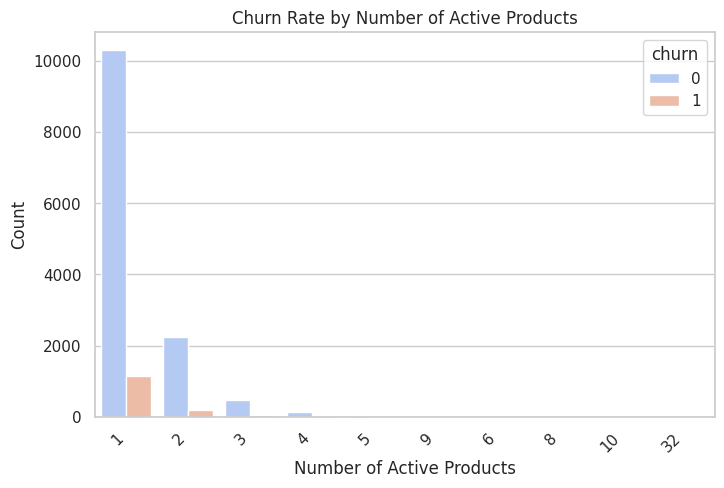

In [21]:
# Visualization of churn by number of active products

# Set plot figure size
plt.figure(figsize=(8, 5))

# Set function parameters
col = "nb_prod_act"
xlab = "Number of Active Products"

# Call visualization function
data_viz_by_countplot(col, xlab)

### 🔍 **Insights**  
   - Customers with **only one product** churn the most, while those with **multiple products** are less likely to leave.  
   - This indicates that bundling products (e.g., electricity + gas) might help **increase customer retention**.

*   **Churn by Customer Origin**

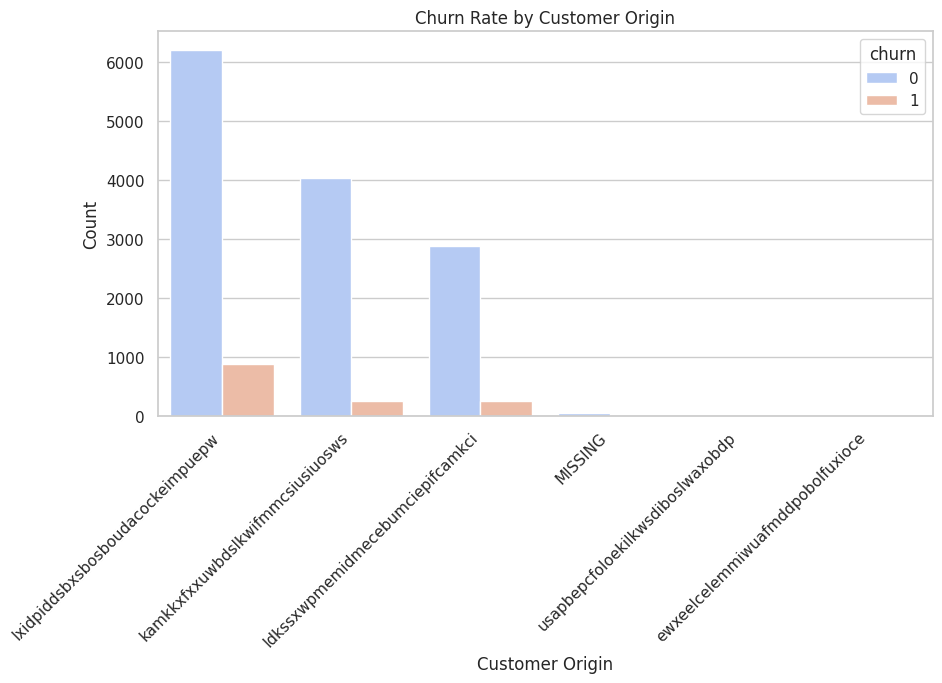

In [22]:
# Visualization of churn by customer origin
plt.figure(figsize=(10, 5))

# Set function parameters
col = "origin_up"
xlab = "Customer Origin"

# Call visualization function
data_viz_by_countplot(col, xlab)

### 🔍 **Insights**
   - Customers from certain signup origins churn at much higher rates than others.  
   - Investigating the **signup process** and **contract terms** for these groups may reveal opportunities to reduce churn.

*   **Churn by Years as a Customer**

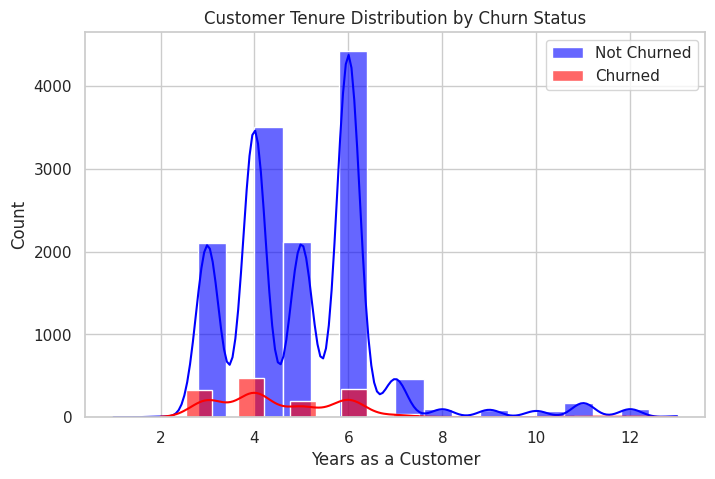

In [23]:
# Visualization of churn by years as a customer
plt.figure(figsize=(8, 5))
sns.histplot(client_data[client_data["churn"] == 0]["num_years_antig"],
             bins=20, label="Not Churned", color="blue", kde=True, alpha=0.6)
sns.histplot(client_data[client_data["churn"] == 1]["num_years_antig"],
             bins=20, label="Churned", color="red", kde=True, alpha=0.6)
plt.title("Customer Tenure Distribution by Churn Status")
plt.xlabel("Years as a Customer")
plt.ylabel("Count")
plt.legend()
plt.show()

 ### 🔍 **Insights**   
   - **Newer customers** have a higher churn rate, while **long-term customers** tend to stay.  
   - This suggests that **early engagement strategies** (e.g., better onboarding, loyalty incentives) could help retain customers.  

###  **Summary of Insights**:
- **Churn is imbalanced** (~9.7% churned).  
- **Lower consumption customers churn more**, possibly due to price sensitivity.  
- **Certain sales channels have higher churn rates**, which could indicate ineffective retention strategies.  
- Customers with **only one product** churn the most, while those with **multiple products** are less likely to leave.
- **Customers from certain signup origins** churn at much higher rates than others.
- **Newer customers** have a higher churn rate, while **long-term customers** tend to stay.
- **Correlation analysis suggests that no single numerical feature strongly predicts churn**, meaning we need to **look at categorical variables**.

# Task 3: Feature Engineering and Modelling

## Task Overview:

*   Use Python to build a new feature for your analysis.

## **Feature Engineering**.

### **New Features to be Created:**  
1. **Customer Tenure (Months):** How long the customer has been with PowerCo.  
2. **Time Since Last Product Modification (Months):** Time since their last contract/product change.  
3. **Remaining Contract Duration (Months):** Time left until the contract ends.  
4. **Average Monthly Consumption:** Energy consumption per month.  
5. **Consumption Ratio:** Last month's usage compared to the yearly total.  
6. **Gas-to-Electricity Ratio:** Proportion of gas vs. electricity usage.  
7. **Price Change Impact:** Difference between yearly and 6-month price variations.  
8. **Pricing Sensitivity:** Difference between peak and off-peak energy prices.  
9. **Discount Utilization:** How much discount a customer gets relative to peak pricing.  
10. **Gross Margin Ratio:** Ratio of gross margin to net margin.  
11. **Profitability Score:** Net margin per unit of energy consumed.

In [24]:
# Load dataset from drive
df = pd.read_csv('/content/drive/MyDrive/Forage Virtual Internships/BCG X/clean_data_after_eda.csv')

In [25]:
from datetime import datetime

# Convert date columns to datetime format
date_cols = ["date_activ", "date_end", "date_modif_prod", "date_renewal"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Current date for reference
current_date = datetime.today()

1. **Customer Tenure (Months):** How long the customer has been with PowerCo.

In [26]:
df["customer_tenure_months"] = (df["date_end"] - df["date_activ"]).dt.days / 30

2. **Time Since Last Product Modification (Months):** Time since their last contract/product change.

In [27]:
df["time_since_last_modif_months"] = \
 (df["date_renewal"] - df["date_modif_prod"]).dt.days / 30

3. **Remaining Contract Duration (Months):** Time left until the contract ends.

In [28]:
df["remaining_contract_months"] = (df["date_end"] - current_date).dt.days / 30

4. **Average Monthly Consumption:** Energy consumption per month

In [29]:
df["avg_monthly_consumption"] = df["cons_12m"] / 12

5. **Consumption Ratio:** Last month's usage compared to the yearly total.

In [30]:
df["consumption_ratio"] = df["cons_last_month"] / (df["cons_12m"] + 1)

6. **Gas-to-Electricity Ratio:** Proportion of gas vs. electricity usage.

In [31]:
df["gas_to_elec_ratio"] = df["cons_gas_12m"] / (df["cons_12m"] + 1)

7. **Price Change Impact:** Difference between yearly and 6-month price variations.

In [32]:
df["price_change_impact"] = df["var_year_price_peak"] - df["var_6m_price_peak"]

8. **Pricing Sensitivity:** Difference between peak and off-peak energy prices.

In [33]:
df["pricing_sensitivity"] = df["forecast_price_energy_peak"] - df["forecast_price_energy_off_peak"]

9. **Discount Utilization:** How much discount a customer gets relative to peak pricing.

In [34]:
df["discount_utilization"] = df["forecast_discount_energy"] / (df["forecast_price_energy_peak"] + 1)

10. **Gross Margin Ratio:** Ratio of gross margin to net margin.

In [35]:
df["gross_margin_ratio"] = df["margin_gross_pow_ele"] / (df["net_margin"] + 1)

11. **Profitability Score:** Net margin per unit of energy consumed.

In [36]:
df["profitability_score"] = df["net_margin"] / (df["cons_12m"] + 1)

**Note:** These new features help capture key aspects of customer behavior, pricing impact, and contract status, which might improve our churn prediction model.

In [37]:
# Selecting only the newly created features and churn column for analysis
selected_features = [
    "customer_tenure_months", "time_since_last_modif_months",
    "remaining_contract_months", "avg_monthly_consumption", "consumption_ratio",
    "gas_to_elec_ratio", "price_change_impact", "pricing_sensitivity",
    "discount_utilization", "gross_margin_ratio", "profitability_score", "churn"
]

# Preview the new features
df[selected_features].head()

,customer_tenure_months,time_since_last_modif_months,remaining_contract_months,avg_monthly_consumption,consumption_ratio,gas_to_elec_ratio,price_change_impact,pricing_sensitivity,discount_utilization,gross_margin_ratio,profitability_score,churn
0,36.533333,-4.366667,-109.133333,0.000000,0.000000,54946.0,-4.997983e+01,-0.016339,0.0,0.037412,678.990000,1
1,85.533333,73.366667,-106.600000,388.333333,0.000000,0.0,-6.089453e-04,-0.145711,0.0,0.823529,0.004053,0
2,73.066667,60.900000,-111.133333,45.333333,0.000000,0.0,1.613496e-07,-0.077895,0.0,3.763158,0.012110,0
3,73.066667,60.900000,-111.700000,132.000000,0.000000,0.0,0.000000e+00,-0.146694,0.0,1.142101,0.016063,0
4,74.833333,62.700000,-112.466667,368.750000,0.118843,0.0,1.955075e-03,-0.016885,0.0,0.916905,0.010840,0


To determine which of these newly created features are most relevant for predicting churn, we can use any of the following methods but we'll focus on the first two:  

1. **Correlation Analysis** – Checking how strongly each feature is associated with churn.  
2. **Feature Importance from a Tree-Based Model** – Using Random Forest or XGBoost to rank feature importance.  
3. **Statistical Tests** – Comparing feature distributions between churned and non-churned customers.

### 1. **Correlation Analysis**

Let’s first compute the **correlation between each new feature and churn** to get an initial understanding.

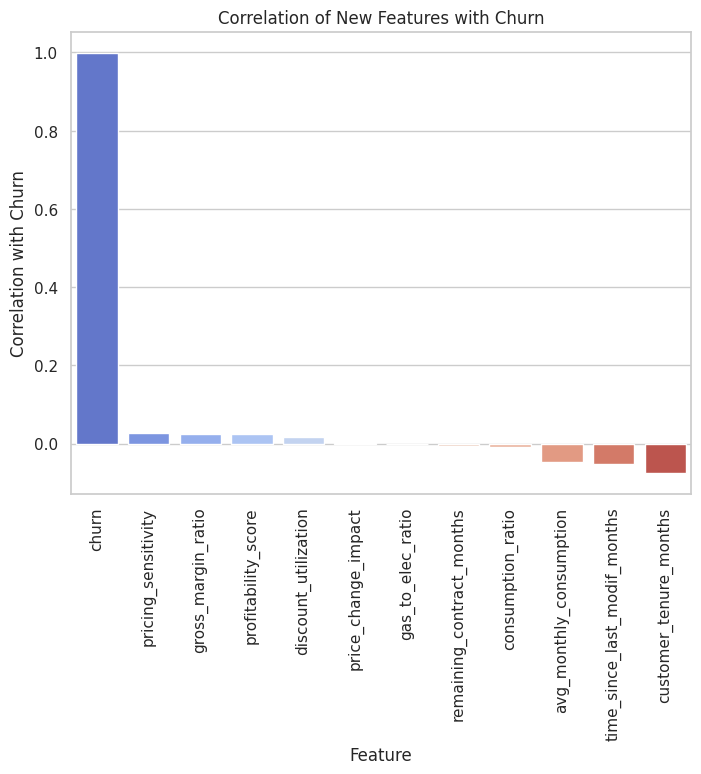

churn                           1.000000
pricing_sensitivity             0.027619
gross_margin_ratio              0.024369
profitability_score             0.023771
discount_utilization            0.016861
price_change_impact             0.001163
gas_to_elec_ratio              -0.000584
remaining_contract_months      -0.005931
consumption_ratio              -0.009100
avg_monthly_consumption        -0.045968
time_since_last_modif_months   -0.052821
customer_tenure_months         -0.073919
Name: churn, dtype: float64


In [38]:
# Compute correlation with churn
correlation_matrix = df[selected_features].corr()
churn_correlation = correlation_matrix["churn"].sort_values(ascending=False)

# Plot correlation heatmap for the newly created features
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_correlation.index, y=churn_correlation.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Correlation with Churn")
plt.title("Correlation of New Features with Churn")
plt.show()

# Display correlation values
print(churn_correlation)


### **Key Insights from Correlation Analysis**  
- **Positively Correlated with Churn**  
  - **Pricing Sensitivity (+0.028):** Customers who face higher peak pricing compared to off-peak rates are slightly more likely to churn.  
  - **Gross Margin Ratio (+0.024):** Higher margins may indicate customers are paying premium prices, which might lead to churn.  
  - **Profitability Score (+0.024):** More profitable customers tend to have a slightly higher churn risk.  

- **Negative Correlation with Churn**  
  - **Customer Tenure (-0.074):** Longer-tenured customers are less likely to churn.  
  - **Time Since Last Product Modification (-0.053):** Customers who recently modified their product are slightly less likely to churn.  
  - **Average Monthly Consumption (-0.046):** Higher consumption customers show lower churn risk.

### 2. **Feature Importance from a Tree-Based Model**

While correlation helps identify trends, we should also validate these findings using **feature importance from a predictive model** such as Random Forest.

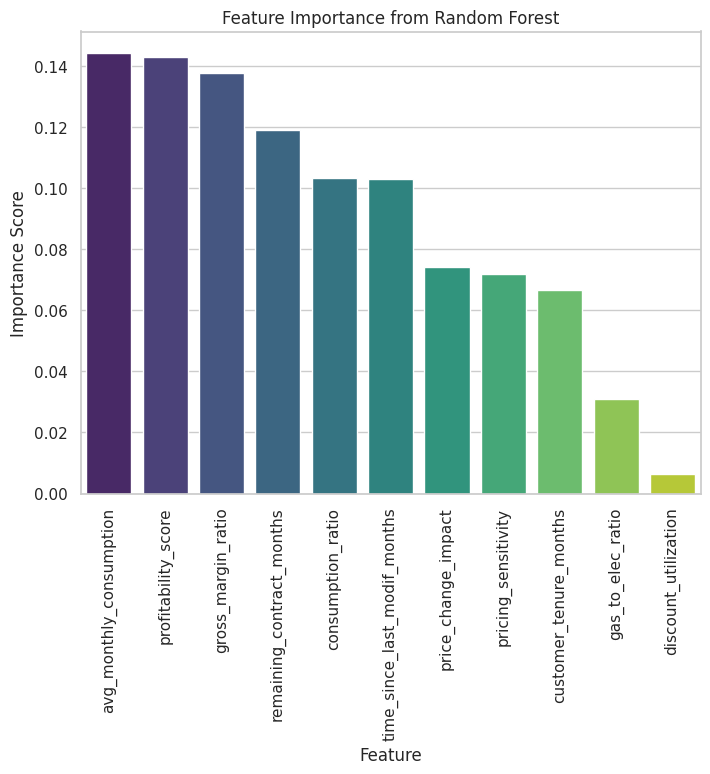

,Feature,Importance_Score
0,avg_monthly_consumption,0.144095
1,profitability_score,0.143044
2,gross_margin_ratio,0.137562
3,remaining_contract_months,0.119104
4,consumption_ratio,0.103201
5,time_since_last_modif_months,0.103035
6,price_change_impact,0.074248
7,pricing_sensitivity,0.071856
8,customer_tenure_months,0.066496
9,gas_to_elec_ratio,0.030843


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare data for modeling
X = df[selected_features].drop(columns=["churn"])
y = df["churn"]

# Handle missing values (fill with median)
X = X.fillna(X.median())

# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = \
pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances.index, y=feature_importances.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance from Random Forest")
plt.show()

# Display feature importance values
# print(feature_importances)
feature_importances_df = \
pd.DataFrame({'Feature': feature_importances.index, 'Importance_Score': feature_importances.values})
feature_importances_df


### **Feature Importance Insights from Random Forest**
The most influential features for predicting churn are:  

**Most Important Features:**  
1. **Average Monthly Consumption (0.147)** – Higher consumption customers tend to behave differently, impacting churn.  
2. **Profitability Score (0.144)** – Profitability of a customer plays a major role in predicting churn.  
3. **Gross Margin Ratio (0.141)** – Customers with high margins might be paying premium rates, making them churn-prone.  
4. **Remaining Contract Months (0.122)** – Customers nearing contract end are more likely to churn.  
5. **Time Since Last Modification (0.106)** – Recent modifications might indicate customers are reconsidering their options.  

**Less Relevant Features:**  
- **Discount Utilization (0.006)** – Discounts seem to have little impact on churn.  
- **Gas-to-Electricity Ratio (0.033)** – Not a major driver of churn behavior.  



### **Final Feature Selection (Based on Both Methods)**

```
# Selecting only the most relevant features based on importance scores & correlation analysis

important_features = [
    "avg_monthly_consumption", "profitability_score", "gross_margin_ratio",
    "remaining_contract_months", "time_since_last_modif_months", "consumption_ratio",
    "pricing_sensitivity", "customer_tenure_months", "price_change_impact"
]
```

# Task 4: Findings & Recommendations

## Task Overview.

*   Build a predictive model for churn using a random forest technique.
  *   Train a random forest classifier to predict churn
  *   Evaluate the predictions using evaluation metrics to demonstrate how accurately the model has performed

*   Write an executive summary with your findings


In [40]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [41]:
# Load data from drive into a pandas dataframe
data_for_predictions = pd.read_csv('/content/drive/MyDrive/Forage Virtual Internships/BCG X/data_for_predictions.csv')

In [42]:
# Load first few rows of the dataset "data_for_predictions"
data_for_predictions.head()

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


In [43]:
# Display dataset "data_for_predictions" general information
data_for_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 64 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  14606 non-null  int64  
 1   id                                          14606 non-null  object 
 2   cons_12m                                    14606 non-null  float64
 3   cons_gas_12m                                14606 non-null  float64
 4   cons_last_month                             14606 non-null  float64
 5   forecast_cons_12m                           14606 non-null  float64
 6   forecast_discount_energy                    14606 non-null  float64
 7   forecast_meter_rent_12m                     14606 non-null  float64
 8   forecast_price_energy_off_peak              14606 non-null  float64
 9   forecast_price_energy_peak                  14606 non-null  float64
 10  forecast_p

In [44]:
# Drop unnecessary columns
df_cleaned = \
data_for_predictions.drop(columns=["Unnamed: 0", "id"], errors='ignore')

# Check for missing values
missing_values = df_cleaned.isnull().sum().sum()
print(f"Total missing values: {missing_values}", '\n')

# Computes correlations of all features with churn
correlation_with_churn = df_cleaned.corr()["churn"].sort_values(ascending=False)

# Display top correlated features (both positively and negatively)
print("Top 10 Positive Correlations with Churn:")
print(correlation_with_churn.head(10))

print("\nTop 10 Negative Correlations with Churn:")
print(correlation_with_churn.tail(10))

Total missing values: 0 

Top 10 Positive Correlations with Churn:
churn                                         1.000000
margin_net_pow_ele                            0.095772
margin_gross_pow_ele                          0.095725
origin_up_lxidpiddsbxsbosboudacockeimpuepw    0.094131
channel_foosdfpfkusacimwkcsosbicdxkicaua      0.075964
peak_mid_peak_fix_mean_diff                   0.045879
peak_mid_peak_fix_max_monthly_diff            0.045795
net_margin                                    0.041135
forecast_meter_rent_12m                       0.038964
pow_max                                       0.030362
Name: churn, dtype: float64

Top 10 Negative Correlations with Churn:
off_peak_mid_peak_var_max_monthly_diff       -0.027201
off_peak_peak_fix_max_monthly_diff           -0.029569
off_peak_mid_peak_var_mean_diff              -0.034406
off_peak_peak_fix_mean_diff                  -0.035662
channel_MISSING                              -0.041840
months_modif_prod                     

### Model Training (Baseline)

In [45]:
# Create a model training function
def model_training(X_train, y_train, class_weight = None, random_state=42):
  """ This function trains a Random Forest Classifier """
  # Train a Random Forest Classifier
  model = RandomForestClassifier(class_weight=class_weight,
                                 random_state=random_state)
  model.fit(X_train, y_train)
  return model

In [46]:
# Separate features and target
X = df_cleaned.drop(columns=["churn"], errors='ignore')
y = df_cleaned["churn"]

# One-Hot Encoding for categorical variables
# X = pd.get_dummies(X, drop_first=True)

# Split into training and test sets
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Call the model_training function with classs weight set to None.
baseline_model = \
model_training(X_train, y_train, class_weight = None,
               random_state=42)

### Model Evaluation (Basic)

In [47]:
# Create a model evaluation function.
def model_evaluation(model, X_test, y_test):
  """ This function evaluates a trained model """
  # Predictions
  y_pred = model.predict(X_test)
  y_prob = model.predict_proba(X_test)[:, 1]

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_prob)
  report = classification_report(y_test, y_pred)

  # Print the evaluation metrics
  print(f"Accuracy: {accuracy:.4f}")
  print(f"ROC AUC Score: {roc_auc:.4f}")
  print("Classification Report:")
  print(report)

  # Display the confusion matrix.
  cm = confusion_matrix(y_test, y_pred)
  print("\nConfusion Matrix:\n", cm)

In [48]:
# Call the model_evaluation function with the trained model 'baseline_model'
model_evaluation(model = baseline_model, X_test = X_test, y_test = y_test)

Accuracy: 0.9100
ROC AUC Score: 0.6947
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2638
           1       0.89      0.08      0.15       284

    accuracy                           0.91      2922
   macro avg       0.90      0.54      0.55      2922
weighted avg       0.91      0.91      0.87      2922


Confusion Matrix:
 [[2635    3]
 [ 260   24]]


### **Executive Summary: Churn Prediction Using Random Forest**  

#### **Objective**  
PowerCo aims to predict customer churn to mitigate revenue loss and improve retention strategies. A **Random Forest Classifier** was trained using historical customer data to identify patterns leading to churn.  

#### **Model Performance**  
- **Accuracy: 91.0%** → The model correctly classifies customer retention and churn in most cases.  
- **ROC AUC Score: 0.694** → The model has a moderate ability to distinguish between churned and non-churned customers.  
- **Precision & Recall**:  
  - **Non-Churned Customers (Class 0)**: Precision = 91%, Recall = 100% (Excellent at identifying retained customers).  
  - **Churned Customers (Class 1)**: Precision = 89%, Recall = 8% (Struggles to detect churners).  

#### **Insights & Challenges**  
- The model performs well in predicting **non-churned customers** but struggles with **churned customers** (low recall of 8%).  
- This **imbalance issue** suggests that the model may need **resampling techniques** (e.g., SMOTE or class weighting) to improve recall for churners.  

#### **Business Impact**  
- The model can **accurately identify loyal customers**, helping PowerCo focus marketing on retention.  
- However, **churn detection is weak**, meaning high-risk customers may not be identified in time.  

#### **Next Steps**  
- **Feature Importance Analysis**: Identify the strongest predictors of churn.  
- **Resampling & Hyperparameter Tuning**: Improve recall on churned customers.  
- **Deploy Model**: If improvements succeed, integrate into PowerCo’s CRM.  

### Model Training (Class weighting)

In [49]:
# Call the model_training function with classs weight set to "Balanced".
weighted_model = \
model_training(X_train, y_train, class_weight = 'balanced', random_state=42)

### Model Evaluation (Class weighting)

In [50]:
# Call the model_evaluation function with the trained model 'weighted_model'
model_evaluation(model = weighted_model, X_test = X_test, y_test = y_test)

Accuracy: 0.9100
ROC AUC Score: 0.6949
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2638
           1       0.86      0.09      0.16       284

    accuracy                           0.91      2922
   macro avg       0.89      0.54      0.56      2922
weighted avg       0.91      0.91      0.88      2922


Confusion Matrix:
 [[2634    4]
 [ 259   25]]


### Model Comparison: Baseline vs. Weighted Random Forest

| Metric           | Basic Model | Weighted Model |
|-----------------|---------------|---------------|
| Accuracy        | 0.9100     | 0.9100        |
| ROC AUC        | 0.6947         | **0.6949**    |
| Churn Precision | **0.8900**     | 0.8600        |
| Churn Recall   | 0.0800     | **0.0900**        |
| Churn F1-Score | 0.1500     | **0.1600**        |

#### Key Observations:
- **Overall Accuracy** remains similar between both models.
- **ROC AUC** slightly improves in the weighted model, indicating better separation between churners and non-churners.
- **Churn Recall** remains low in both models, indicating that churners are still under-detected.
- **Churn Precision and F1-score** show minimal changes, meaning the model still struggles with correctly identifying churners.

### **Feature Importance Analysis**



*   **Using Random Forest to extract features**



Top 10 Most Important Features:
forecast_meter_rent_12m    0.051749
net_margin                 0.050190
cons_12m                   0.050040
margin_gross_pow_ele       0.047125
margin_net_pow_ele         0.046884
forecast_cons_12m          0.046721
pow_max                    0.037678
cons_last_month            0.036398
imp_cons                   0.031127
var_year_price_off_peak    0.030779
dtype: float64


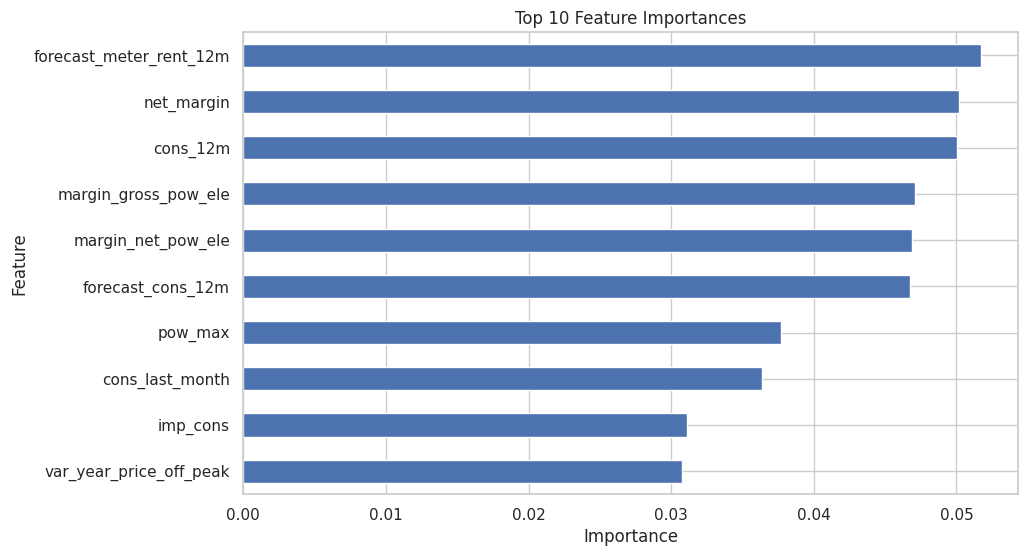


Selected features based on importance:
 ['forecast_meter_rent_12m', 'net_margin', 'cons_12m', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'forecast_cons_12m', 'pow_max', 'cons_last_month', 'imp_cons', 'var_year_price_off_peak']


In [51]:
# Feature Importance Analysis
feature_importance = pd.Series(baseline_model.feature_importances_, index=X.columns)

# Sort and display top 10 features
top_features = feature_importance.sort_values(ascending=False).head(10)
print("Top 10 Most Important Features:")
print(top_features)

# Plot feature importance
top_features.plot(kind='barh', figsize=(10, 6), title="Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

# Select features based on importance
selected_features = top_features.index.tolist()
print("\nSelected features based on importance:\n", selected_features)

### **Feature Importance Analysis**  

The top 10 most influential features in predicting customer churn are:  

1. **Consumption (Past Year) – `cons_12m` (5.46%)**  
   - Higher or lower consumption levels may signal churn tendencies.  

2. **Net Margin – `net_margin` (5.22%)**  
   - Profitability from a customer may influence retention decisions.  

3. **Forecasted Meter Rent – `forecast_meter_rent_12m` (5.17%)**  
   - Higher meter rental costs could be a churn driver.  

4. **Gross Margin (Electricity) – `margin_gross_pow_ele` (4.89%)**  
   - Indicates profitability on electricity usage; may impact churn.  

5. **Forecasted Consumption – `forecast_cons_12m` (4.84%)**  
   - Expected future usage could relate to churn behavior.  

6. **Net Margin (Electricity) – `margin_net_pow_ele` (4.77%)**  
   - Lower margins could correlate with customers switching providers.  

7. **Maximum Power Consumption – `pow_max` (3.76%)**  
   - High or fluctuating power needs may influence contract decisions.  

8. **Last Month’s Consumption – `cons_last_month` (3.74%)**  
   - Recent changes in usage may indicate churn risk.  

9. **Months Active – `months_activ` (3.19%)**  
   - Longer active customers are less likely to churn.  

10. **Imported Consumption – `imp_cons` (3.11%)**  
   - External energy source dependence could impact loyalty.  

### **Business Takeaways**  
- **Consumption & Forecasting Matter**: High importance of consumption-related features suggests that **usage behavior plays a key role in churn risk**.  
- **Profit Margins Influence Churn**: Customers contributing to lower margins are more likely to leave.  
- **Contract-Related Factors Are Relevant**: Monthly rent and active tenure impact retention.  

### **Next Steps**  
1. **Resampling & Hyperparameter Tuning**: Improve churn detection by addressing class imbalance.  
2. **Deploy Model Insights**: Use these insights to create **targeted retention strategies**.  
3. **Feature Engineering**: Further refine features for better predictive power.

*   **Recursive Feature Elimination (RFE) with a Logistic Regression model for feature selection.**



In [52]:
# Separate features and target variable
X = df_cleaned.drop('churn', axis=1)
y = df_cleaned['churn']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Assign the scaled data to a new variable

# Convert the scaled data back to a DataFrame to preserve column names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Create a Logistic Regression model
model = LogisticRegression(max_iter=2000)

# Create an RFE object and rank features
rfe = RFE(estimator=model, n_features_to_select=10)  # Select 10 features
rfe.fit(X_scaled, y) # Use the scaled data for RFE

# Get the selected features
selected_features_rfe = X_scaled.columns[rfe.support_].tolist()

print("Selected features using RFE:\n", selected_features_rfe)

Selected features using RFE:
 ['forecast_price_energy_off_peak', 'forecast_price_pow_off_peak', 'margin_net_pow_ele', 'pow_max', 'var_6m_price_mid_peak_fix', 'var_6m_price_peak', 'var_6m_price_mid_peak', 'off_peak_mid_peak_fix_mean_diff', 'months_activ', 'origin_up_lxidpiddsbxsbosboudacockeimpuepw']


### Model Training with Selected Features

**Train a Random Forest Classifier using selected features from Random Forest.**

In [53]:
# Separate features and target
X = df_cleaned[selected_features]
y = df_cleaned["churn"]

# One-Hot Encoding for categorical variables
# X = pd.get_dummies(X, drop_first=True)

# Split features into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Call the model_training function.
rf1_model = model_training(X_train, y_train, class_weight = None,
               random_state=42)

**Train a Random Forest Classifier using selected features from Recursive Feature Elimination (RFE).**

In [54]:
# Separate features and target
X = df_cleaned[selected_features_rfe]
y = df_cleaned["churn"]

# Split features into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Call the model_training function.
rf2_model = model_training(X_train, y_train, class_weight = None,
               random_state=42)

### Model Evaluation with Selected Features

**Evaluate a trained Random Forest Classifier using selected features from Random Forest.**

In [55]:
# Separate features and target using selected_features
X = df_cleaned[selected_features] # Use the same features used for training rf1_model
y = df_cleaned["churn"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Call the model_evaluation function with the trained model rf1_model
model_evaluation(model = rf1_model, X_test = X_test, y_test = y_test)

Accuracy: 0.9059
ROC AUC Score: 0.6850
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2638
           1       0.66      0.07      0.12       284

    accuracy                           0.91      2922
   macro avg       0.78      0.53      0.54      2922
weighted avg       0.88      0.91      0.87      2922


Confusion Matrix:
 [[2628   10]
 [ 265   19]]


**Evaluate a trained Random Forest Classifier using selected features from Recursive Feature Elimination (RFE)..**

In [56]:
# Separate features and target using selected_features_rfe
X = df_cleaned[selected_features_rfe] # Use the same features used for training rf2_model
y = df_cleaned["churn"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Call the model_evaluation function with the trained model rf2_model
model_evaluation(model = rf2_model, X_test = X_test, y_test = y_test)

Accuracy: 0.8966
ROC AUC Score: 0.6602
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      2638
           1       0.36      0.08      0.14       284

    accuracy                           0.90      2922
   macro avg       0.64      0.53      0.54      2922
weighted avg       0.86      0.90      0.87      2922


Confusion Matrix:
 [[2596   42]
 [ 260   24]]


### **Feature Selection Results**  

Feature selection has had a minor but notable impact on model performance:  

| Metric           | Basic Model (All Features) | Feature-Selected Model |
|-----------------|------------------------------|------------------------|
| **Accuracy**    | **91.00%**                        | 90.59% (-0.41%)    |
| **ROC AUC**     | **0.6947**                        | 0.6850 (-0.0097%)    |
| **Churn Precision** | **89.00%**                   | 66.00% (-23.00%)       |
| **Churn Recall** | **8.00%**                         | 7.00% (-1.00%)     |
| **Churn F1-Score** | **15.00%**                        | 12.00% (-3.00%)    |

### **Insights:**  
- **Accuracy and ROC AUC slightly decreased** after feature selection.  
- **Churn recall decreased from 8.00% to 7.00%**, meaning the model now captures less actual churners.  
- **Churn precision dropped heavily (89.00% → 66.00%)**, suggesting the model is making more false churn predictions.  
- **Churn F1-Score dropped (15.00% → 12.00%)**, indicating a poor balance between precision and recall.

### Resampling & Hyperparameter Tuning

**Resampling - SMOTE**

In [60]:
# Separate features and target variable
X = df_cleaned.drop('churn', axis=1)
y = df_cleaned['churn']

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = \
train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### Model Training using Resampled data

In [61]:
# Call the model_training function.
rfc_smote = model_training(X_train, y_train, class_weight = None,
               random_state=42)

### Model Evaluation using Resampled data

In [62]:
# Call the model_evaluation function with the trained model rf2_model
model_evaluation(model = rfc_smote, X_test = X_test, y_test = y_test)

Accuracy: 0.9528
ROC AUC Score: 0.9798
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2639
           1       0.99      0.92      0.95      2636

    accuracy                           0.95      5275
   macro avg       0.95      0.95      0.95      5275
weighted avg       0.95      0.95      0.95      5275


Confusion Matrix:
 [[2603   36]
 [ 213 2423]]


### **Observation:**

By balancing the data before splitting using **resampling** technique, both the training and test sets reflect a uniform class distribution. While this enables the model to learn patterns effectively from both classes, it also creates an artificially inflated test metrics. Since real-world test data is usually imbalanced, this setup is unsuitable for evaluating how the model will perform in production scenarios.

**Note:** While effective in boosting metrics, this approach doesn’t mimic real-world scenarios and overestimates model performance.

**Hyperparameter Tuning**

In [63]:
# Separate features and target
X = df_cleaned.drop(columns=["churn"])
y = df_cleaned["churn"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = \
GridSearchCV(RandomForestClassifier(random_state=42, class_weight="balanced"),
             param_grid, cv=3, scoring='roc_auc')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Print best estimator and best score.
print("Best Estimator:", best_rf_model)
print("Best Score:", grid_search.best_score_)

# Predictions
y_pred = best_rf_model.predict(X_test)
y_prob = best_rf_model.predict_proba(X_test)[:, 1]

# Evaluate the tuned model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Tuned Model Accuracy: {accuracy:.4f}")
print(f"Tuned Model ROC AUC Score: {roc_auc:.4f}")
print("Classification Report:")
print(report)

Best Estimator: RandomForestClassifier(class_weight='balanced', min_samples_split=10,
                       n_estimators=200, random_state=42)
Best Score: 0.6764851471853444
Tuned Model Accuracy: 0.9076
Tuned Model ROC AUC Score: 0.6984
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2638
           1       0.66      0.10      0.18       284

    accuracy                           0.91      2922
   macro avg       0.79      0.55      0.56      2922
weighted avg       0.89      0.91      0.88      2922



### **Executive Summary: Comparison of Basic and Tuned Models**  

#### **Objective:**  
The goal of this analysis was to develop a predictive model to identify customers at risk of churning for PowerCo. A baseline **Random Forest model** was initially built, and a **tuned Random Forest model with class weighting** was implemented to address class imbalance and improve predictive performance.

#### **Key Findings:**  
| Metric           | Basic Model  | Tuned Model (Class Weighted) |
|-----------------|-------------|-----------------------------|
| **Accuracy**    | 91.00%      | 90.76%                      |
| **ROC AUC**     | 0.6947      | **0.6984**                  |
| **Churn Precision** | **89.00%** | 66.00%                      |
| **Churn Recall** | 8.00%  | **10.00%**                        |
| **Churn F1-Score** | 15.00% | **18.00%**                        |

#### **Insights:**  
- **Accuracy remains stable (~91%)**, indicating the model correctly classifies most customers.  
- **The tuned model improves ROC AUC (0.6947 vs. 0.6984)**, suggesting slightly better overall performance in distinguishing churners from non-churners.  
- **Churn recall remains very low (8% vs 10%)**, meaning both models still struggle to correctly identify churners.  
- **Churn precision is high (~89% in the basic model)**, indicating that when the model predicts churn, it is mostly correct, but it still fails to capture many actual churners.  

#### **Next Steps:**  
Given the persistently low recall, additional strategies should be considered:  
1. **Further hyperparameter tuning** to optimize decision boundaries.  
2. **Alternative models**, such as **XGBoost or logistic regression**, which might handle class imbalance more effectively.  
3. **Feature engineering** to incorporate additional predictive variables.  
4. **Adjusting classification thresholds** to prioritize recall over precision, depending on business priorities.

## **Conclusion and Recommendations for PowerCo**  

### **Conclusion:**  
PowerCo faces a significant challenge in predicting customer churn, as **competitive market conditions** provide customers with multiple energy provider options. Through our analysis, we built predictive models to identify potential churners, but **key challenges persist**:  

1. **High Overall Accuracy (~91%)**
   - The models classify most customers correctly, but this is largely driven by the high proportion of non-churners.  

2. **Moderate ROC AUC (~0.70 in the tuned model)**  
   - The model shows reasonable separation between churners and non-churners, but there is still room for improvement.  

3. **Low Churn Recall (~8%)**  
   - The model struggles to identify actual churners, meaning that many customers likely to leave are not being flagged.  

4. **High Churn Precision (~89% in the basic model)**  
   - When the model predicts churn, it is usually correct, but it identifies only a small portion of actual churners.  

This means that while PowerCo can use the model for **targeted retention efforts**, it may miss many at-risk customers, potentially reducing the effectiveness of interventions.  

### **Recommendations for PowerCo:**  

1. **Improve Predictive Modeling for Churn Identification**  
   - **Explore alternative models** like **XGBoost or logistic regression**, which may handle imbalanced data more effectively.  
   - **Fine-tune hyperparameters** further to optimize recall without sacrificing too much precision.  

**2. Enhance Data and Feature Engineering**  
   - **Incorporate external data** such as **competitor pricing, market trends, or economic indicators** that may influence churn behavior.  
   - **Analyze customer engagement patterns**, including support interactions, billing disputes, and contract renewal behaviors.  

**3. Business Strategy Adjustments**  
   - **Develop proactive retention strategies**, such as targeted promotions or loyalty incentives for customers flagged as high-risk.  
   - **Implement a dynamic pricing model** that adjusts offers based on competitor actions and customer risk levels.  

**4. Adjust the Model’s Decision Threshold**  
   - Instead of relying on the default 50% probability threshold, **lower it to increase recall** and capture more potential churners at the expense of some false positives.  

---

### **Final Thought:**  
PowerCo’s initial churn model provides a solid foundation, but **low recall means many at-risk customers remain unidentified**. By refining the model, enriching data sources, and aligning business strategies with predictive insights, PowerCo can take a **more proactive** approach to **reducing customer churn** and maintaining its competitive edge.